# Split Apply Combine

Often times, we will want to split a dataset based on a key value in a column, and do something within this group, and return this information for each group.  We will often see this referred to as the **split-apply-combine** paradigm.  With Pandas, we will often use the `groupby` method to carry out the splitting piece of this. 

**OBJECTIVES**:

- Use `groupby` to split dataset into groups, and groups within groups
- Apply different methods to `groupby` objects
- Use aggregation methods on `groupby` objects
- Write and use functions of our own on `groupby` objects with `apply`

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [33]:
df = pd.DataFrame({'street': ['a', 'a', 'b', 'b', 'a', 'b','b','a'],
                  'agent': ['agent A', 'agent A', 'agent B', 'agent A', 'agent B', 'agent A', 'agent B', 'agent A'],
                  'sq_ft': np.random.randint(1000, 4500, 8),
                  'price': np.random.randint(100000, 600000, 8)})

In [34]:
df.head()

,street,agent,sq_ft,price
0,a,agent A,2296,113858
1,a,agent A,2434,365133
2,b,agent B,2239,185134
3,b,agent A,4452,166715
4,a,agent B,3317,337196


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
street    8 non-null object
agent     8 non-null object
sq_ft     8 non-null int64
price     8 non-null int64
dtypes: int64(2), object(2)
memory usage: 336.0+ bytes


### `groupby` Basics

To begin, it is important to recognize that the result of using the `groupby` method is a `groupby` object.  This is an object that has simply grouped the data according to our input.  From here, we can select columns like usual and apply basic quantitative methods.  If we wanted to know the average square footage by agent in our mini-data above, we select the column we are concerned with (`df['sq_ft']`), and group this by agent(`.groupby(df['agent'])`).  We are returned an object for which we can then apply the mean to.  Below, we save our grouped data as `grouped`, and can subsequently perform a variety of methods.

In [26]:
df['sq_ft'].groupby(df['agent'])

In [18]:
# line above is just the split, the data organized into two groupings
# one thing we can do is save the split data to an object

In [37]:
grouped = df['sq_ft'].groupby(df['agent'])

In [38]:
grouped.mean()

agent
agent A    2284.600000
agent B    3271.666667
Name: sq_ft, dtype: float64

In [39]:
grouped.count()

agent
agent A    5
agent B    3
Name: sq_ft, dtype: int64

In [40]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
agent,,,,,,,,
agent A,5.0,2284.600000,1363.008731,1100.0,1141.0,2296.0,2434.0,4452.0
agent B,3.0,3271.666667,1010.762748,2239.0,2778.0,3317.0,3788.0,4259.0


In [43]:
grouped_price = df['price'].groupby(df['agent'])
grouped_price.mean()

agent
agent A    336017.200000
agent B    308077.333333
Name: price, dtype: float64

We can pass more than one value to group by, and will be returned an object that has two levels of indices.  For example, if we wanted to know:

$$
\textit{What is the average price for each agent by street?}
$$

We will select the price column, group the data by agent and street, and apply the mean method to this.  Notice that there are two levels of indices, *agent* and *street*.  We can return a dataframe that unstacks the levels with the `unstack` method.  

In [ ]:
# Introducting a 2nd grouping object in the question, looking for agent by street

In [44]:
means = df['price'].groupby([df['agent'], df['street']]).mean()

In [45]:
means

agent    street
agent A  a         335943.0
         b         336128.5
agent B  a         337196.0
         b         293518.0
Name: price, dtype: float64

In [46]:
means.keys()
# 2 levels - agent , multi-level index has street 'A' and 'B'

MultiIndex(levels=[['agent A', 'agent B'], ['a', 'b']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['agent', 'street'])

In [48]:
means.unstack()

#turns 2nd level index into a column name
#and now you have a data frame object
#can still refer to values based on their indices

street,a,b
agent,,
agent A,335943.0,336128.5
agent B,337196.0,293518.0


In [49]:
means[0]

335943.0

In [50]:
means[3]

293518.0

In [51]:
means.shape

(4,)

<IPython.core.display.Javascript object>


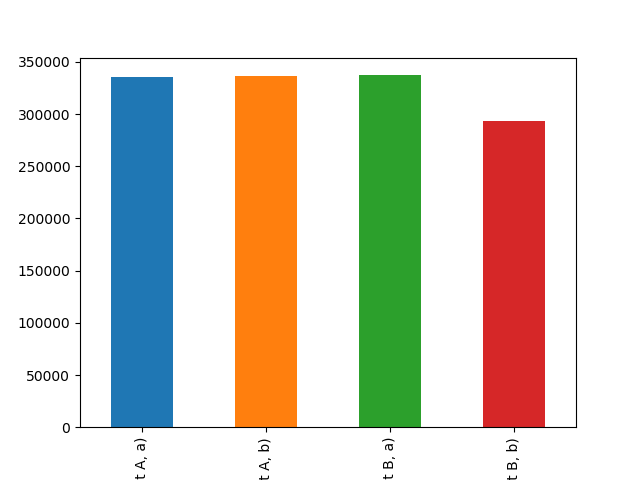

In [55]:
plt.show()
means.plot(kind='bar')

### Example I 

Using our tips dataset example, we can explore a few straightforward questions using `groupby()`.  

1. What is the average tip by gender?
2. What is the max tip on each day?
3. What is the min tip on each day by time?
4. What is the average bill by party size?

In [56]:
tips = sns.load_dataset('tips')

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
tips.groupby('sex')
# Returns two groups - male and female
# All the groupby does is split things
# From this we want to find the average tip

In [59]:
tips.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [61]:
tips.groupby('sex')['tip'].sum()

sex
Male      485.07
Female    246.51
Name: tip, dtype: float64

In [63]:
tips.groupby('sex')[['tip']].mean()
# Double brackets [[..]] bring back a data frame

,tip
sex,
Male,3.089618
Female,2.833448


In [64]:
tips.groupby('sex')[['tip']].sum()

,tip
sex,
Male,485.07
Female,246.51


### What is the average tip for male/female by day?

In [74]:
tips['tip'].groupby([tips['sex'], tips['day']]).mean()

sex     day 
Male    Thur    2.980333
        Fri     2.693000
        Sat     3.083898
        Sun     3.220345
Female  Thur    2.575625
        Fri     2.781111
        Sat     2.801786
        Sun     3.367222
Name: tip, dtype: float64

<IPython.core.display.Javascript object>


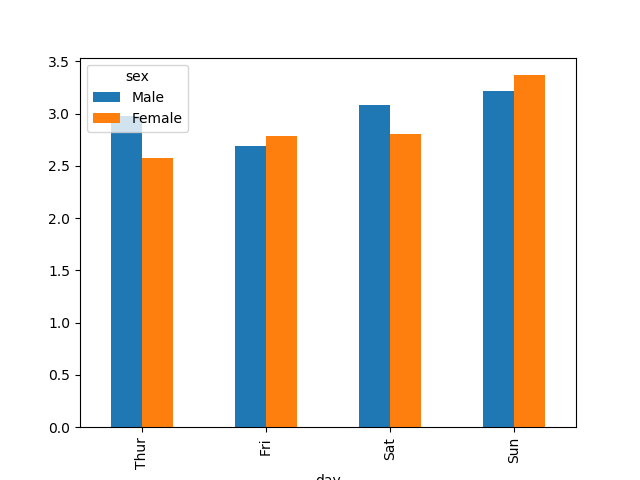

In [80]:
tips['tip'].groupby([tips['sex'], tips['day']]).mean().unstack()

plt.show()
tips['tip'].groupby([tips['day'], tips['sex']]).mean().unstack().plot(kind='bar')

<IPython.core.display.Javascript object>


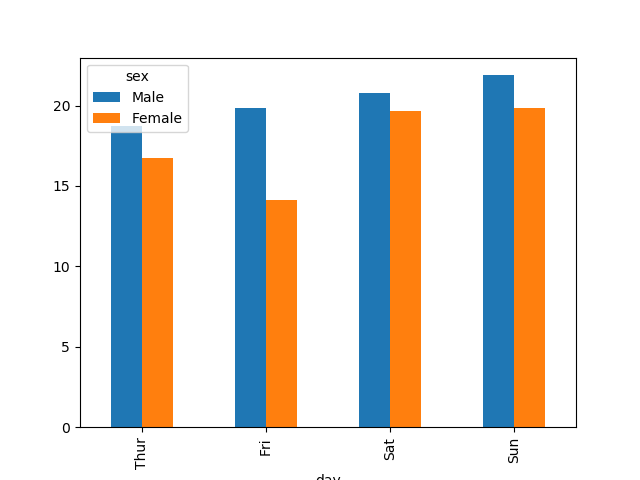

In [89]:
tips.total_bill.groupby([tips['day'], tips['sex']]).mean().unstack().plot(kind='bar')

In [72]:
tips.groupby('day')[['tip']].max()

,tip
day,
Thur,6.70
Fri,4.73
Sat,10.00
Sun,6.50


In [83]:
min_tip = tips.groupby([tips['day'],tips['time']]).min()

#my attempt

In [84]:
min_tip

size   tip  total_bill
day  time                          
Thur Lunch    1.0  1.25        7.51
     Dinner   2.0  3.00       18.78
Fri  Lunch    1.0  1.58        8.58
     Dinner   2.0  1.00        5.75
Sat  Lunch    NaN   NaN         NaN
     Dinner   1.0  1.00        3.07
Sun  Lunch    NaN   NaN         NaN
     Dinner   2.0  1.01        7.25

In [90]:
tips.groupby(['day','time'])[['tip']].min()

# Notice day and time are passed through as a list

tip
day  time        
Thur Lunch   1.25
     Dinner  3.00
Fri  Lunch   1.58
     Dinner  1.00
Sat  Lunch    NaN
     Dinner  1.00
Sun  Lunch    NaN
     Dinner  1.01

In [92]:
tips.groupby(['size','smoker'])[['total_bill']].mean()

total_bill
size smoker            
1    Yes       5.825000
     No        8.660000
2    Yes      17.955758
     No       15.342333
3    Yes      28.191667
     No       21.009615
4    Yes      30.609091
     No       27.769231
5    Yes      29.305000
     No       30.576667
6    Yes            NaN
     No       34.830000

In [93]:
tips = sns.load_dataset('tips')

In [94]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [95]:
tips.groupby('sex')[['tip']].mean()

,tip
sex,
Male,3.089618
Female,2.833448


In [ ]:
tips.groupby('day')[['tip']].max()

In [ ]:
tips.groupby(['day', 'time'])[['tip']].min()

In [35]:
tips.groupby(['size', 'day'])[[ 'tip']].mean().unstack()

tip                              
day     Thur       Fri       Sat       Sun
size                                      
1     1.8300  1.920000  1.000000       NaN
2     2.4425  2.644375  2.517547  2.816923
3     2.6925  3.000000  3.797778  3.120667
4     4.2180  4.730000  4.123846  4.087778
5     5.0000       NaN  3.000000  4.046667
6     5.3000       NaN       NaN  5.000000

Average bill and tip by smoker and time.

In [88]:
tips.groupby(['smoker', 'time'])[['total_bill', 'tip']].mean()

total_bill       tip
smoker time                        
Yes    Lunch    17.399130  2.834348
       Dinner   21.859429  3.066000
No     Lunch    17.050889  2.673778
       Dinner   20.095660  3.126887

In [36]:
tips.groupby(['smoker', 'time'])[['total_bill', 'tip']].mean().unstack()

total_bill                  tip          
time        Lunch     Dinner     Lunch    Dinner
smoker                                          
Yes     17.399130  21.859429  2.834348  3.066000
No      17.050889  20.095660  2.673778  3.126887

## The results of the groupby object are iterable.  For example, if we group the tips data by smoker, we get back the group and the elements of this group.  For multiple indicies of groups, we pass these as tuples.

In [96]:
for name, group in tips.groupby(['smoker']):
    print(name)
    print(group)

Yes
     total_bill   tip     sex smoker   day    time  size
56        38.01  3.00    Male    Yes   Sat  Dinner     4
58        11.24  1.76    Male    Yes   Sat  Dinner     2
60        20.29  3.21    Male    Yes   Sat  Dinner     2
61        13.81  2.00    Male    Yes   Sat  Dinner     2
62        11.02  1.98    Male    Yes   Sat  Dinner     2
63        18.29  3.76    Male    Yes   Sat  Dinner     4
67         3.07  1.00  Female    Yes   Sat  Dinner     1
69        15.01  2.09    Male    Yes   Sat  Dinner     2
72        26.86  3.14  Female    Yes   Sat  Dinner     2
73        25.28  5.00  Female    Yes   Sat  Dinner     2
76        17.92  3.08    Male    Yes   Sat  Dinner     2
80        19.44  3.00    Male    Yes  Thur   Lunch     2
83        32.68  5.00    Male    Yes  Thur   Lunch     2
90        28.97  3.00    Male    Yes   Fri  Dinner     2
92         5.75  1.00  Female    Yes   Fri  Dinner     2
93        16.32  4.30  Female    Yes   Fri  Dinner     2
95        40.17  4.73    Ma

In [97]:
for (n1, n2), group in tips.groupby(['sex', 'smoker']):
    print(n1, n2)
    print(group)

Male Yes
     total_bill    tip   sex smoker   day    time  size
56        38.01   3.00  Male    Yes   Sat  Dinner     4
58        11.24   1.76  Male    Yes   Sat  Dinner     2
60        20.29   3.21  Male    Yes   Sat  Dinner     2
61        13.81   2.00  Male    Yes   Sat  Dinner     2
62        11.02   1.98  Male    Yes   Sat  Dinner     2
63        18.29   3.76  Male    Yes   Sat  Dinner     4
69        15.01   2.09  Male    Yes   Sat  Dinner     2
76        17.92   3.08  Male    Yes   Sat  Dinner     2
80        19.44   3.00  Male    Yes  Thur   Lunch     2
83        32.68   5.00  Male    Yes  Thur   Lunch     2
90        28.97   3.00  Male    Yes   Fri  Dinner     2
95        40.17   4.73  Male    Yes   Fri  Dinner     4
96        27.28   4.00  Male    Yes   Fri  Dinner     2
97        12.03   1.50  Male    Yes   Fri  Dinner     2
98        21.01   3.00  Male    Yes   Fri  Dinner     2
105       15.36   1.64  Male    Yes   Sat  Dinner     2
106       20.49   4.06  Male    Yes   S

In [ ]:
# (n1,n2) adding tuple because this is multi level index

In [106]:
#one-liner to create dictionary of groups
pieces = dict(list(tips.groupby('sex')))


In [99]:
pieces['Male'].head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [42]:
pieces['Female'].head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [123]:
list(pieces.keys())

['Male', 'Female']

### Data Aggregation

Here, we are interested in using the aggreate function to apply functions that we have developed which return scalar values.  For example, we can write a function that determines the range of tips on a given day.  We are taking all of the values for tips by group, and finding a single value for this.  Similarly, we could do something like investigate the quantiles of each group.

In [43]:
grouped = tips.groupby('day')

In [44]:
def ranger(df):
    return df.max() - df.min()

In [ ]:
# After defining a function you can apply this to your group

In [ ]:
# Agg function will automatically apply to only numerical values

In [45]:
grouped.agg(ranger)

,total_bill,tip,size
day,,,
Thur,35.60,5.45,5
Fri,34.42,3.73,3
Sat,47.74,9.00,4
Sun,40.92,5.49,4


In [ ]:
grouped.quantile(0.7)

In [ ]:
grouped.quantile(0.9)['tip']

We can add a tip percentage column as follows.

In [46]:
tips['pct_tip'] = tips['tip']/tips['total_bill']

In [47]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [50]:
tips.groupby(['sex', 'smoker'])['pct_tip'].agg('mean')

sex     smoker
Male    Yes       0.152771
        No        0.160669
Female  Yes       0.182150
        No        0.156921
Name: pct_tip, dtype: float64

In [51]:
tips.groupby(['sex', 'smoker'])['pct_tip'].agg(['mean', 'std', ranger])

#Using agg function so can apply multiple operators

mean       std    ranger
sex    smoker                              
Male   Yes     0.152771  0.090588  0.674707
       No      0.160669  0.041849  0.220186
Female Yes     0.182150  0.071595  0.360233
       No      0.156921  0.036421  0.195876

In [52]:
tips.groupby(['sex', 'smoker'])['pct_tip'].agg([('Average Tipping Percentage', 'mean'), ('Standard Deviation', 'std'), ('Range', ranger)])

#Allows you to change name of columns titles

Average Tipping Percentage  Standard Deviation     Range
sex    smoker                                                          
Male   Yes                       0.152771            0.090588  0.674707
       No                        0.160669            0.041849  0.220186
Female Yes                       0.182150            0.071595  0.360233
       No                        0.156921            0.036421  0.195876

In [53]:
funcs = ['mean', 'max', 'min', 'std']

In [54]:
tips.groupby(['sex', 'smoker'])['pct_tip'].agg(funcs)

mean       max       min       std
sex    smoker                                        
Male   Yes     0.152771  0.710345  0.035638  0.090588
       No      0.160669  0.291990  0.071804  0.041849
Female Yes     0.182150  0.416667  0.056433  0.071595
       No      0.156921  0.252672  0.056797  0.036421

In [ ]:
#overwrite results with new
#column names
func_named = [('Average', 'mean'), ('Maximum', 'max')]

In [ ]:
tips.groupby(['sex', 'smoker'])['pct_tip'].agg(func_named)

In [ ]:
#pass different aggregation functions
tips.groupby(['sex', 'smoker']).agg({'tip': np.min, 'pct_tip': np.max})

In [ ]:
#pass multiple aggregation functions as a list
tips.groupby(['sex', 'smoker']).agg({'tip': [np.min, np.mean], 'pct_tip': np.max})

In [ ]:
#ignore index labels, changes it back to regular dataframe
tips.groupby(['sex', 'smoker'], as_index=False).agg({'tip': [np.min, np.mean], 'pct_tip': np.max})

### Exercise

Using the titanic data, let's use the `groupby` function to provide aggregate information about groups.

1. How many male and female passengers survived and died?
2. How many passengers from each class lived and died?
3. Create a new column that uses the `age` column to create the groups:
  - Children
  - Teenagers
  - Young Adults
  - Middle Aged
  - Older
  - Senior
  
You are free to define these as you see fit.  Further, you should use better and easier labels in your code.  Investigate the survival within each of these groups.

In [55]:
titanic = pd.read_csv('data/eda_data/titanic.csv')

In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [60]:
titanic.groupby (['survived','sex']).sum()

#question 1 answer

pclass       age  sibsp  parch        fare
survived sex                                               
0        female     231   1603.00     98     84   1864.9752
         male      1159  11382.50    206     97  10277.7447
1        female     447   5683.00    120    120  12101.6876
         male       220   2536.67     42     39   4449.5418

In [61]:
titanic.groupby (['survived','sex']).sum().unstack()

#question 1 answer

pclass           age            sibsp       parch             fare  \
sex      female  male  female      male female male female male      female   
survived                                                                      
0           231  1159  1603.0  11382.50     98  206     84   97   1864.9752   
1           447   220  5683.0   2536.67    120   42    120   39  12101.6876   

                      
sex             male  
survived              
0         10277.7447  
1          4449.5418

In [85]:
survive = titanic.groupby(['survived','pclass'])

#question 2 answer

In [86]:
survive.count()

#question 2 answer

name  sex  age  sibsp  parch  ticket  fare  cabin  embarked
survived pclass                                                             
0        1         80   80   64     80     80      80    80     59        80
         2         97   97   90     97     97      97    97      3        97
         3        372  372  270    372    372     372   372      6       372
1        1        136  136  122    136    136     136   136    117       134
         2         87   87   83     87     87      87    87     13        87
         3        119  119   85    119    119     119   119      6       119

In [81]:
titanic.groupby(['survived','pclass'])[['survived']].count()

survived
survived pclass          
0        1             80
         2             97
         3            372
1        1            136
         2             87
         3            119

In [87]:
titanic.groupby(['pclass','survived'])[['survived']].count().unstack()

#my attempt

survived     
survived        0    1
pclass                
1              80  136
2              97   87
3             372  119

In [ ]:
titanic['age_group'] = pd.cut(titanic.age, [12, 20, 40, 60, 80, 110], labels=['child', 'teen', 'grown', 'older', 'senior'])

#Using 'cut' method

In [ ]:
titanic.groupby(['sex', 'survived'])['survived'].count()

In [ ]:
titanic.groupby(['pclass', 'survived'])['survived'].count().unstack()

In [88]:
age_group = []
for age in titanic.age:
    if age <= 12:
        age_group.append('child')
    elif age < 20:
        age_group.append('teenager')
    elif age < 50:
        age_group.append('mid-age')
    elif age < 70:
        age_group.append('older')
    else:
        age_group.append('old')
        
#create a list and looping through the age column
#runs comparison for each age
#last else group everyone else that hasn't been counted will be considered 'old'

In [89]:
titanic['age_group'] = age_group

In [90]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mid-age
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mid-age
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,mid-age
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mid-age
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mid-age


In [ ]:
titanic.groupby(['age_group', 'survived'])['survived'].count()

In [ ]:
titanic.groupby(['age_group', 'survived'])['survived'].count().unstack()

### `apply`

Beyond aggregation functions, we can apply a more general call to functions that don't necessarily return a scalar value.  For example, suppose we wanted to pass a function that will take the top 5 tip percentages.  Then, we can apply this to different groupings of the data.  Because our function takes a column argument as well as a top number, we can call these using the `apply` method also.

In [91]:
def top(df, n=5, column='pct_tip'):
    return df.sort_values(by = column)[-n:]

In [92]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   pct_tip
smoker                                                                   
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990

In [ ]:
tips.groupby(['smoker', 'day']).apply(top, n=2, column = 'total_bill')

In [ ]:
tips.groupby('smoker', group_keys = False).apply(top)

#Won't show index values

In [ ]:
tips.groupby('smoker')['pct_tip'].describe(percentiles = [])

In [ ]:
tips.groupby('smoker')['pct_tip'].describe(percentiles = []).unstack()

### Example for filling `na`

Suppose we have a dataset that we want to use group specific values as replacements for missing values.  In the example below, it seems we have some missing bidderrate values.  Perhaps we make the assumption that an acceptable replacement would be the average bidder rating for each auction.  To apply this, we first split the data and pass an anonymous `lambda` function that will be applied to each group.  In this case, we are filling the `na` values with the `mean`.

In [93]:
auction = pd.read_csv('data/auction/auction.csv')

In [94]:
auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
auctionid       10681 non-null int64
bid             10681 non-null float64
bidtime         10681 non-null float64
bidder          10665 non-null object
bidderrate      10670 non-null float64
openbid         10681 non-null float64
price           10681 non-null float64
item            10681 non-null object
auction_type    10681 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 751.1+ KB


In [96]:
auction.bidderrate.describe()

count    10670.000000
mean        31.936739
std        120.594074
min         -4.000000
25%          1.000000
50%          5.000000
75%         21.000000
max       3140.000000
Name: bidderrate, dtype: float64

In [95]:
auction.groupby('auctionid').mean().head()

#grouping by auctionId
#We can use these to fill the missing bid rate values

,bid,bidtime,bidderrate,openbid,price
auctionid,,,,,
1638843936,1167.857143,4.378416,38.428571,500.0,1625.0
1638844284,362.500000,1.244913,16.500000,200.0,500.0
1638844464,554.236250,6.225163,9.125000,300.0,740.0
1638844729,284.545455,6.895609,29.636364,225.0,320.0
1638893549,144.500000,2.588555,1.600000,99.0,177.5


In [99]:
fill_bidrate = lambda g: g.fillna(g.mean())

In [100]:
auction_filled = pd.merge(auction, auction.groupby('auctionid').apply(fill_bidrate))

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'auctionid' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [101]:
auction_filled.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


### Further Reading

- [Pandas `groupby` documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html)
- [Datacamp Article](https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby)